In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
words = open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [88]:
block_size = 3 # no. of charaters context
X,Y = [],[]
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '->',itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [91]:
X.shape,Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [90]:
C = torch.randn((27,2))

In [25]:
C[5]

tensor([ 1.6436, -1.6710])

In [24]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([ 1.6436, -1.6710])

In [ ]:
X[13,2]

In [28]:
C[X][13,2]

tensor([0.4424, 0.0251])

In [29]:
C[1]

tensor([0.4424, 0.0251])

In [31]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [32]:
W1 = torch.randn((6,100))
b1 = torch.randn((100))

In [35]:
torch.cat()

torch.Size([32, 2])

In [40]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [45]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [58]:
a.view(3,2,3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [57]:
a.storage()

C:\Users\lenov\AppData\Local\Temp\ipykernel_11232\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [60]:
emb.view(32,6)

tensor([[-0.4244, -1.2380, -0.4244, -1.2380, -0.4244, -1.2380],
        [-0.4244, -1.2380, -0.4244, -1.2380,  1.6436, -1.6710],
        [-0.4244, -1.2380,  1.6436, -1.6710, -0.8936, -0.5011],
        [ 1.6436, -1.6710, -0.8936, -0.5011, -0.8936, -0.5011],
        [-0.8936, -0.5011, -0.8936, -0.5011,  0.4424,  0.0251],
        [-0.4244, -1.2380, -0.4244, -1.2380, -0.4244, -1.2380],
        [-0.4244, -1.2380, -0.4244, -1.2380, -1.0988, -0.2305],
        [-0.4244, -1.2380, -1.0988, -0.2305,  1.1577,  0.2759],
        [-1.0988, -0.2305,  1.1577,  0.2759, -0.5694,  1.1203],
        [ 1.1577,  0.2759, -0.5694,  1.1203, -0.0160,  0.2672],
        [-0.5694,  1.1203, -0.0160,  0.2672, -0.5694,  1.1203],
        [-0.0160,  0.2672, -0.5694,  1.1203,  0.4424,  0.0251],
        [-0.4244, -1.2380, -0.4244, -1.2380, -0.4244, -1.2380],
        [-0.4244, -1.2380, -0.4244, -1.2380,  0.4424,  0.0251],
        [-0.4244, -1.2380,  0.4424,  0.0251, -0.0160,  0.2672],
        [ 0.4424,  0.0251, -0.0160,  0.2

In [61]:
W1.shape,b1.shape

(torch.Size([6, 100]), torch.Size([100]))

In [67]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [69]:
h

tensor([[ 0.9636, -0.6334, -0.3442,  ..., -0.4006, -0.9771,  1.0000],
        [ 0.5946, -0.9997,  0.9184,  ..., -0.5565, -0.9998,  1.0000],
        [ 0.9985, -0.8142, -0.6039,  ..., -0.9028,  0.9311,  0.9999],
        ...,
        [ 0.9797,  0.8585,  0.4147,  ..., -0.9993,  1.0000, -0.9760],
        [ 1.0000,  0.9901,  0.9050,  ..., -0.9988,  0.9999, -0.9943],
        [ 0.3477, -0.9787,  0.9997,  ..., -0.5204, -0.9822, -1.0000]])

In [70]:
W2 = torch.randn((100,27))
b2 = torch.randn((27))

In [71]:
logits = h @ W2 + b2

In [72]:
logits.shape

torch.Size([32, 27])

In [73]:
counts = logits.exp()

In [74]:
prob = counts / counts.sum(1,keepdim=True)


In [75]:
prob.shape

torch.Size([32, 27])

In [77]:
mean = -prob[torch.arange(32),Y].log().mean()

In [78]:
mean

tensor(16.5750)

In [82]:
X.shape,Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [182]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g)
W1 = torch.randn((30,200),generator=g)
b1 = torch.randn(200,generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [183]:
sum(p.nelement() for p in parameters)

11897

In [184]:
for p in parameters:
    p.requires_grad = True

In [185]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [186]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [187]:
X = X.to(device)
Y = Y.to(device)
C = C.to(device)
W1 = W1.to(device)
b1 = b1.to(device)
W2 = W2.to(device)
b2 = b2.to(device)

In [188]:
lri = []
lossi = []
stepi = []

In [189]:

for i in range(50000):
    
    # minibatch contruct
    ix = torch.randint(0,X.shape[0],(32,))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    # lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
loss.item()

21.251523971557617

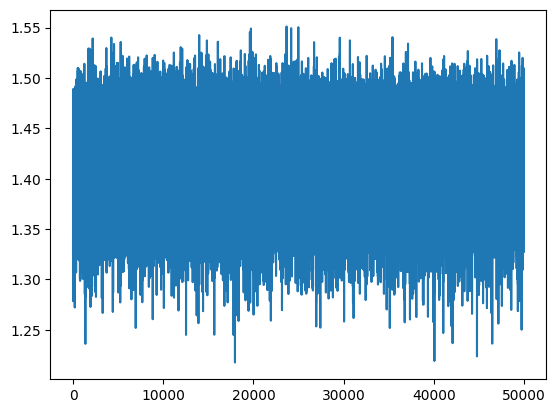

In [190]:
plt.plot(stepi,lossi)

In [191]:
emb = C[X]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(26.0063, device='cuda:0', grad_fn=<NllLossBackward0>)

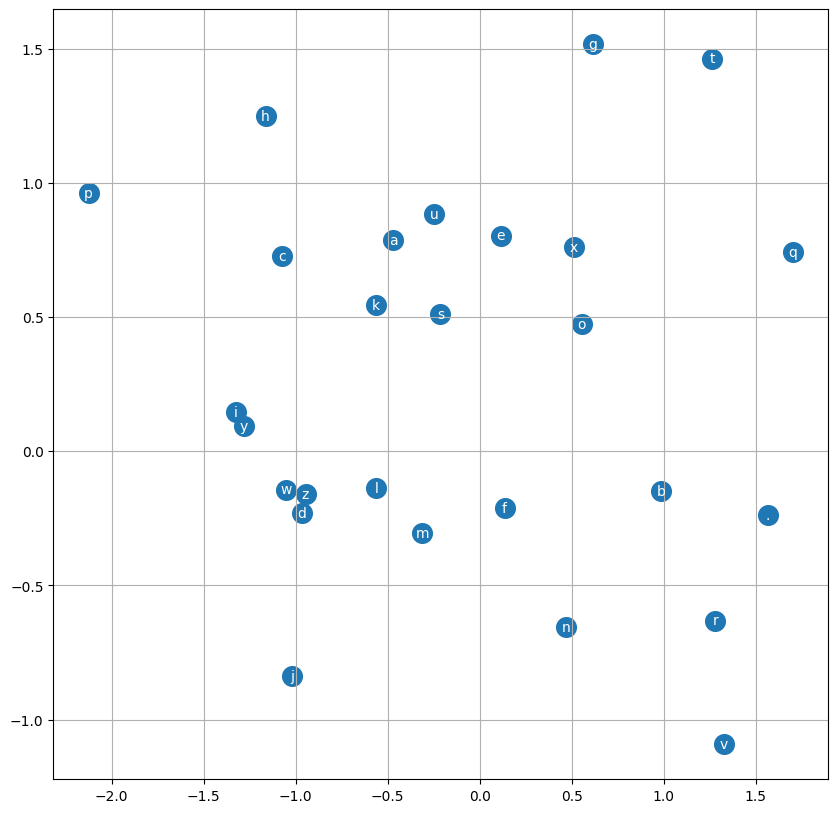

In [192]:
plt.figure(figsize=(10,10))
plt.scatter(C[:,0].data.cpu(),C[:,1].data.cpu(),s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha='center',va='center',color='white')
plt.grid('minor')